In [1]:
#Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score


In [2]:
#Import dataset
data_relevant = pd.read_csv('data_relevant.csv')
data_relevant

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,21,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,25,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,26,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,34,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,39,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,30119,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2733,30128,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2734,30138,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2735,30142,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [3]:
data_relevant = data_relevant.drop(columns=['Unnamed: 0'])

data_relevant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923


## Train Test Split

In [4]:
X = data_relevant.drop('price', axis=1)
y = data_relevant['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1337)

In [5]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
971,2,1.0,1360,180479,1.0,0,0,1984,98038,7,4,661.764706
1309,3,2.5,1850,7684,1.0,560,320,1979,98023,8,4,286.486486
420,3,2.5,1410,11519,1.0,440,200,1983,98028,7,3,212.765957
1296,4,3.0,2260,16665,1.0,420,460,1986,98005,8,4,730.088496
896,2,2.0,1560,4565,1.0,460,240,2004,98053,8,3,528.846154
...,...,...,...,...,...,...,...,...,...,...,...,...
2727,4,3.0,2270,9700,1.0,550,240,1981,98155,8,3,370.484581
1497,6,3.0,2730,11840,1.0,510,210,1978,98052,8,4,641.025641
1256,2,2.0,2300,43560,1.0,2030,0,1988,98042,9,4,358.695652
860,3,2.0,2010,8801,1.0,420,190,1982,98052,7,3,547.263682


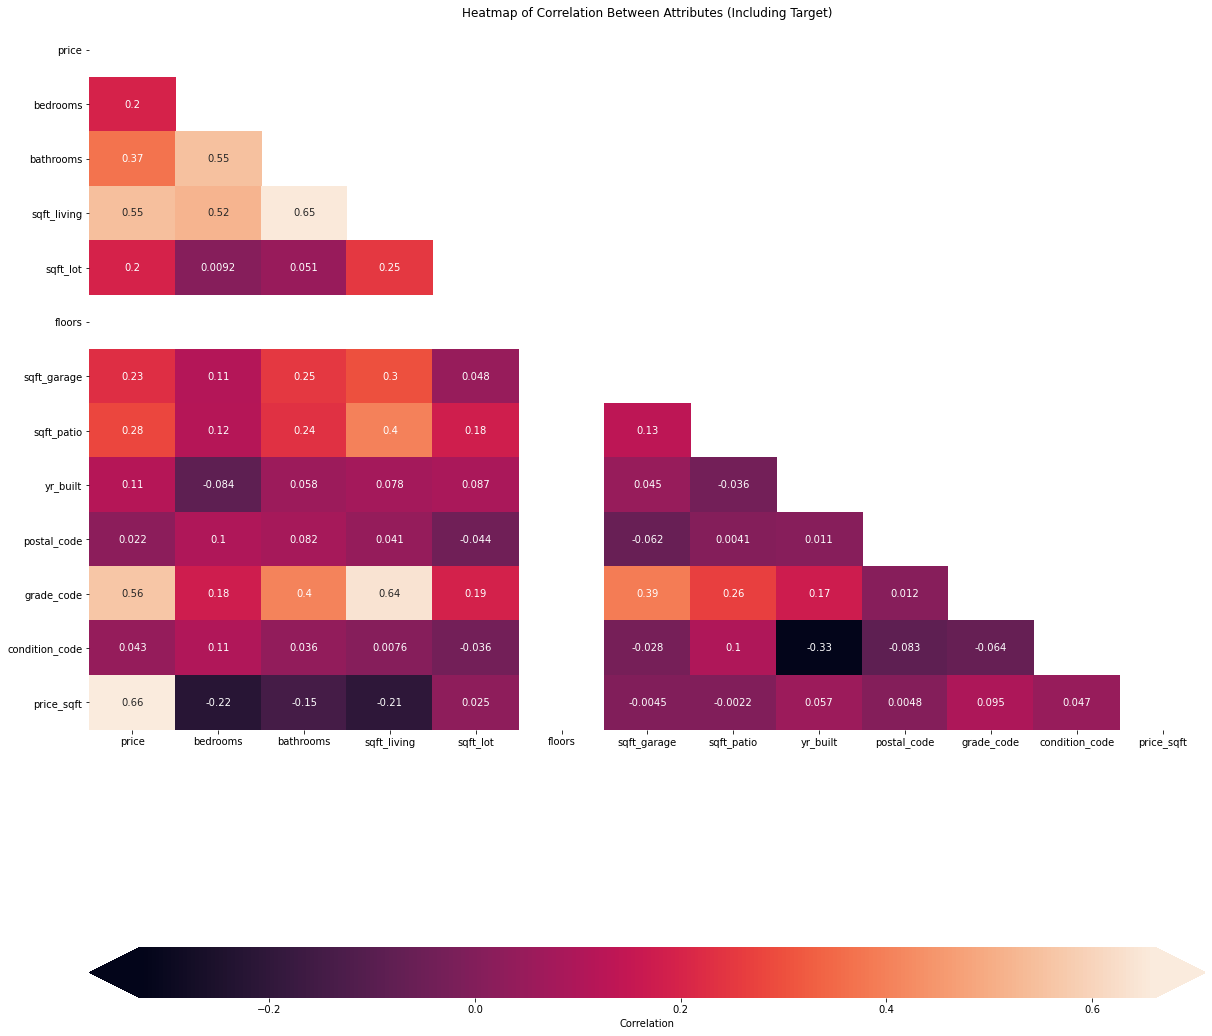

In [6]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

## Scaling

In [7]:
ss = StandardScaler()
ss.fit(X_train)
X_train = pd.DataFrame(ss.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [8]:
#Applying Standard Scaling to only training step to get optimized result 
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)

X_test_scaled = ss.transform(X_test)

X_train_scaled

array([[-1.68821451, -2.26502686, -0.86823701, ..., -0.62451103,
         0.67214939,  1.27161156],
       [-0.40949666,  0.24462108, -0.11003645, ...,  0.63898645,
         0.67214939, -0.9749264 ],
       [-0.40949666,  0.24462108, -0.79086961, ..., -0.62451103,
        -0.81763275, -1.41624156],
       ...,
       [-1.68821451, -0.59192824,  0.58627018, ...,  1.90248393,
         0.67214939, -0.54265876],
       [-0.40949666, -0.59192824,  0.13753924, ..., -0.62451103,
        -0.81763275,  0.58617104],
       [-0.40949666, -2.26502686, -1.1158127 , ..., -0.62451103,
         0.67214939,  0.92681089]])

In [9]:
#Applying Standard Scaling to only training step to get optimized result 
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test), columns= X_test.columns)

X_train_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,-1.688215,-2.265027,-0.868237,3.472011,0.0,-2.248937,-0.989430,-0.368928,-0.351908,-0.624511,0.672149,1.271612
1,-0.409497,0.244621,-0.110036,-0.299129,0.0,0.454265,0.309388,-0.874268,-0.651605,0.638986,0.672149,-0.974926
2,-0.409497,0.244621,-0.790870,-0.215433,0.0,-0.124992,-0.177669,-0.469996,-0.551706,-0.624511,-0.817633,-1.416242
3,0.869221,1.081170,0.524376,-0.103125,0.0,-0.221535,0.877622,-0.166792,-1.011241,0.638986,0.672149,1.680620
4,-1.688215,-0.591928,-0.558767,-0.367200,0.0,-0.028449,-0.015316,1.652430,-0.052211,0.638986,-0.817633,0.475918
...,...,...,...,...,...,...,...,...,...,...,...,...
1828,0.869221,1.081170,0.539850,-0.255132,0.0,0.405994,-0.015316,-0.672132,1.985727,0.638986,-0.817633,-0.472086
1829,3.426657,1.081170,1.251630,-0.208427,0.0,0.212908,-0.137081,-0.975336,-0.072191,0.638986,0.672149,1.147461
1830,-1.688215,-0.591928,0.586270,0.483841,0.0,7.550171,-0.989430,0.035343,-0.271989,1.902484,0.672149,-0.542659
1831,-0.409497,-0.591928,0.137539,-0.274752,0.0,-0.221535,-0.218257,-0.571064,-0.072191,-0.624511,-0.817633,0.586171


In [10]:
X_test_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,-0.375446,1.138687,-0.498235,-0.280783,0.0,0.191064,-0.052150,-0.778199,2.206611,-0.650335,-0.811630,0.097788
1,0.940070,1.138687,-0.207225,-0.238017,0.0,-0.335513,-0.502584,-0.878813,-1.123855,-0.650335,-0.811630,-0.575955
2,-0.375446,-0.597186,0.892147,0.994201,0.0,1.435702,-0.993966,-0.174516,-0.042535,0.653219,0.676632,-0.625270
3,-0.375446,0.270750,0.358628,-0.354573,0.0,-0.335513,1.258201,0.630395,0.411619,0.653219,0.676632,0.721946
4,0.940070,1.138687,-0.045553,-0.026993,0.0,-0.144030,0.070695,0.227939,-0.172294,-0.650335,-0.811630,-0.305634
...,...,...,...,...,...,...,...,...,...,...,...,...
899,0.940070,1.138687,0.035284,-0.292814,0.0,-0.096160,-0.666378,-0.778199,-0.496690,-0.650335,0.676632,-0.962358
900,-1.690962,-0.597186,-0.546737,-0.338532,0.0,-0.048289,-0.011202,1.435306,0.000718,0.653219,-0.811630,0.636228
901,-0.375446,0.270750,1.522669,-0.256721,0.0,0.382547,3.223728,-0.174516,-1.015723,3.260326,0.676632,1.773885
902,-0.375446,-2.333060,-1.403601,-0.275971,0.0,-0.766349,-0.379738,-0.073902,-0.669701,-1.953888,0.676632,-0.198431


# Dummy Model testing / Baseline

In [11]:
X = data_relevant.drop('price', axis=1)
y = data_relevant['price']

dummy_regr = DummyRegressor()
dummy_regr.fit(X_train_scaled, y_train)
dummy_regr.predict(X_train_scaled)
dummy_regr.predict(X_test_scaled)
dummy_regr.score(X_train_scaled, y_train)
dummy_regr.score(X_test_scaled, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train_scaled), squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test_scaled), squared = False)

print(f'Baseline Model Train Score: {dummy_regr.score(X_train_scaled, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test_scaled, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')

Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 383426.0

Baseline Model Test Score: -8.245490061442595e-05
Baseline Model Test RMSE: 393394.0


## 1st Model = Simple Model

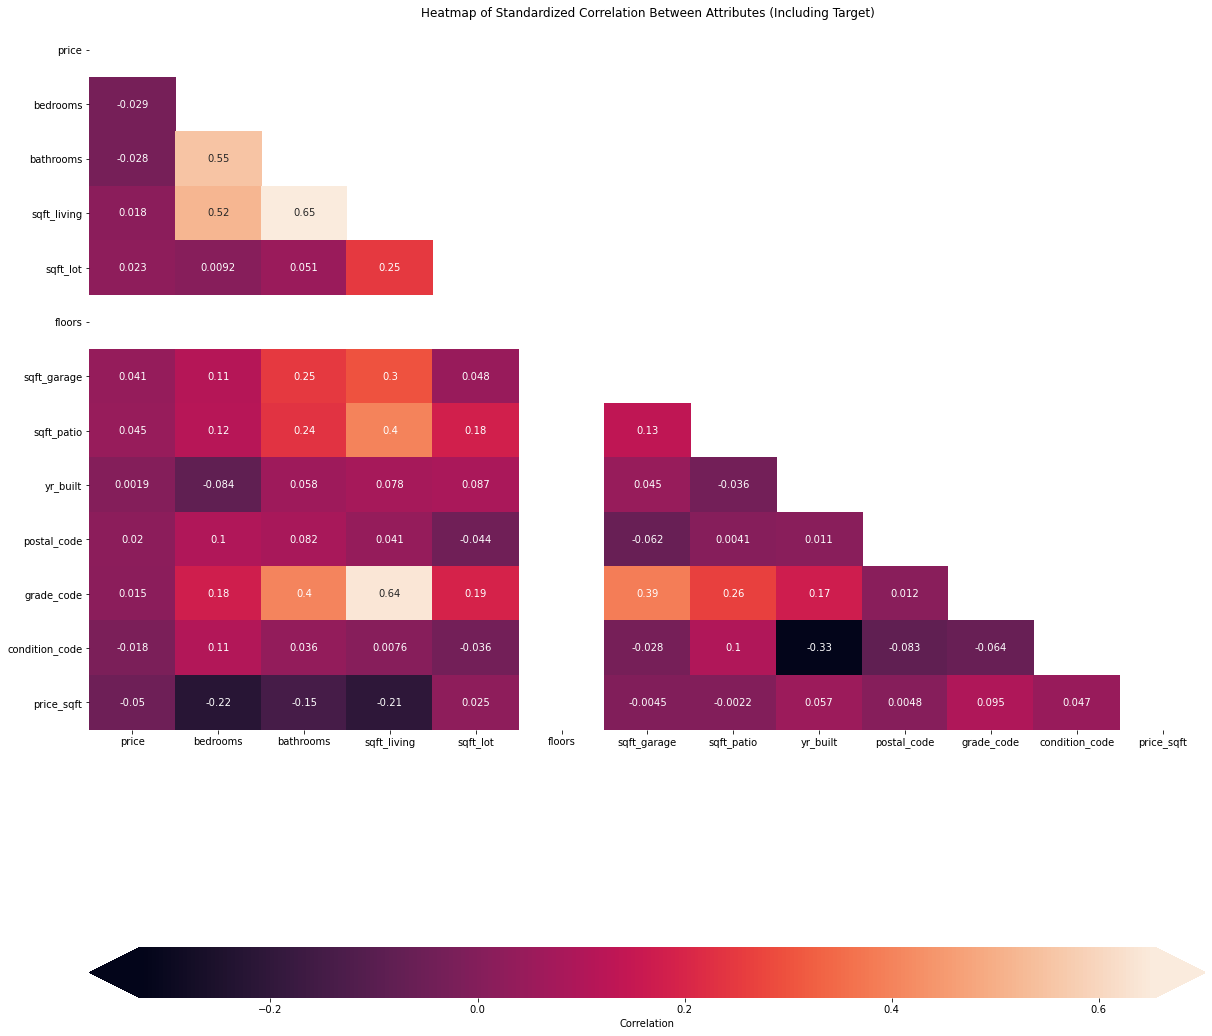

In [12]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Standardized Correlation Between Attributes (Including Target)");

In [13]:
data_relevant.corr()['price'].map(abs).sort_values(ascending=False)

price             1.000000
price_sqft        0.674012
grade_code        0.565665
sqft_living       0.544949
bathrooms         0.356044
sqft_patio        0.273054
sqft_garage       0.220639
bedrooms          0.176019
sqft_lot          0.174579
yr_built          0.094572
condition_code    0.031192
postal_code       0.004452
floors                 NaN
Name: price, dtype: float64

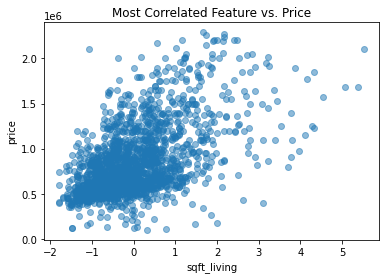

In [14]:
fig, ax = plt.subplots()

ax.scatter(X_train['sqft_living'], y_train, alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
ax.set_title("Most Correlated Feature vs. Price");

In [15]:
X_train_simple_model = X_train_scaled[['sqft_living']]
X_test_simple_model = X_test_scaled[['sqft_living']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

simple_model = LinearRegression()
simple_model.fit(X_train_simple_model,y_train)

simple_model_scores = cross_validate(
    estimator=simple_model,
    X=data_relevant[['sqft_living']],
    y=data_relevant.price,
    return_train_score=True,
    cv=splitter
)

simple_predict_train = simple_model.predict(X_train_simple_model)
simple_predict_test = simple_model.predict(X_test_simple_model)

simple_train_RMSE = MSE(y_train,simple_predict_train,squared = False)
simple_test_RMSE = MSE(y_test,simple_predict_test, squared = False)

print(f'Simple Model Train score: {simple_model_scores["train_score"].mean()}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print()
print("Simple Model Test score: ", simple_model_scores["test_score"].mean())
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')

Simple Model Train score: 0.29797609622751514
Simple Model Train RMSE: 320728.0

Simple Model Test score:  0.2923191610503318
Simple Model Test RMSE: 331180.0


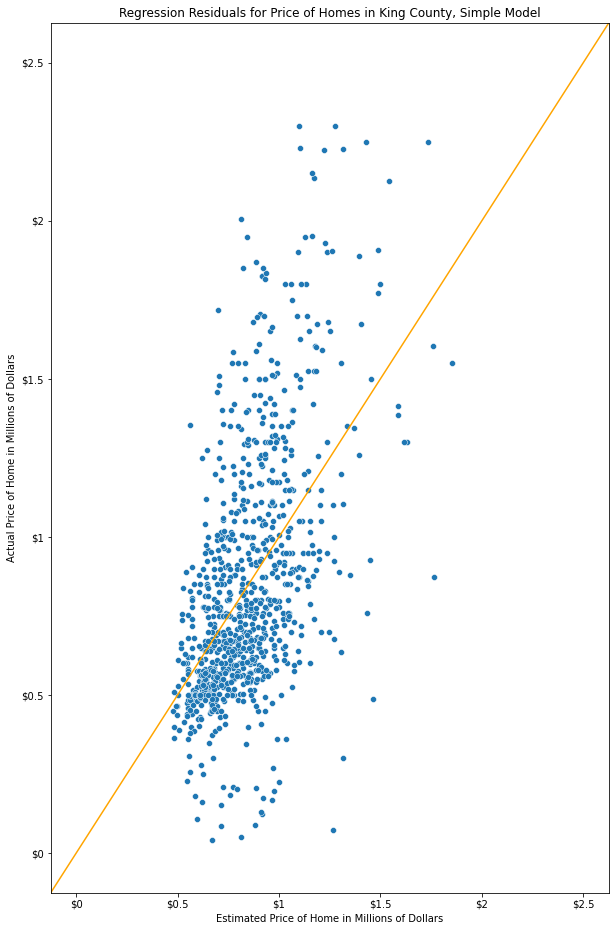

In [21]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = simple_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0,2500000,500000)],[range(0,2500000,500000)]
plt.axline((0,0),(2500000,2500000), color = 'orange')
plt.show()

In [18]:
X_train_second_model = X_train_scaled[['sqft_living','price_sqft']]
X_test_second_model = X_test_scaled[['sqft_living','price_sqft']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

second_model = LinearRegression()
second_model.fit(X_train_second_model,y_train)

second_model_scores = cross_validate(
    estimator=second_model,
    X=data_relevant[['sqft_living']],
    y=data_relevant.price,
    return_train_score=True,
    cv=splitter
)

second_predict_train = second_model.predict(X_train_second_model)
second_predict_test = second_model.predict(X_test_second_model)

second_train_RMSE = MSE(y_train,second_predict_train,squared = False)
second_test_RMSE = MSE(y_test,second_predict_test, squared = False)

print(f'Second Model Train score: {second_model_scores["train_score"].mean()}')
print(f'Second Model Train RMSE: {round(second_train_RMSE)}')
print()
print("Second Model Test score: ", second_model_scores["test_score"].mean())
print(f'Second Model Test RMSE: {round(second_test_RMSE)}')

Second Model Train score: 0.29797609622751514
Second Model Train RMSE: 104673.0

Second Model Test score:  0.2923191610503318
Second Model Test RMSE: 100130.0


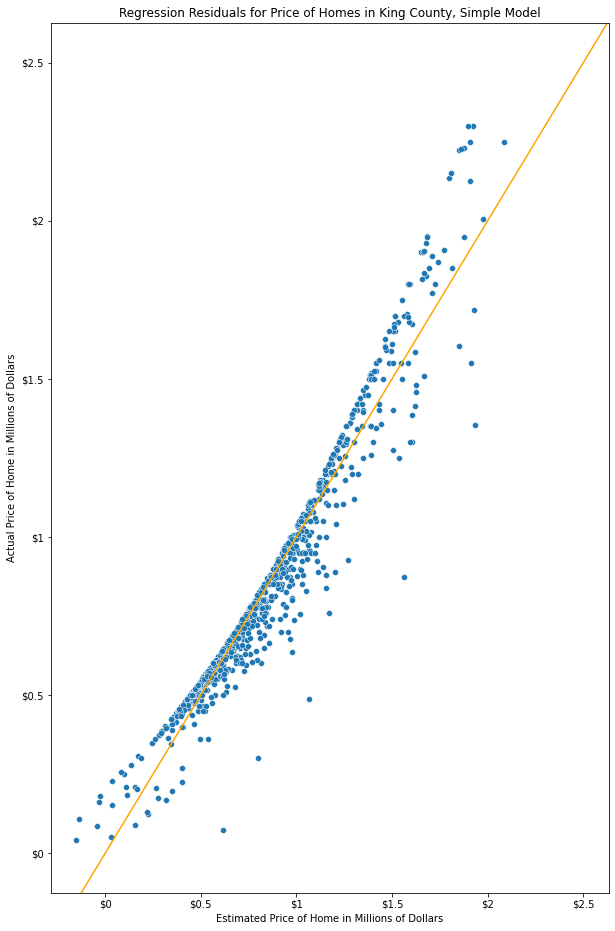

In [22]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = second_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0,2500000,500000)],[range(0,2500000,500000)]
plt.axline((0,0),(2500000,2500000), color = 'orange')
plt.show()

In [19]:
X_train_third_model = X_train_scaled[['sqft_living','grade_code']]
X_test_third_model = X_test_scaled[['sqft_living','grade_code']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

third_model = LinearRegression()
third_model.fit(X_train_third_model,y_train)

third_model_scores = cross_validate(
    estimator=third_model,
    X=data_relevant[['sqft_living']],
    y=data_relevant.price,
    return_train_score=True,
    cv=splitter
)

third_predict_train = third_model.predict(X_train_third_model)
third_predict_test = third_model.predict(X_test_third_model)

third_train_RMSE = MSE(y_train,third_predict_train,squared = False)
third_test_RMSE = MSE(y_test,third_predict_test, squared = False)

print(f'Third Model Train score: {third_model_scores["train_score"].mean()}')
print(f'Third Model Train RMSE: {round(third_train_RMSE)}')
print()
print("Third Model Test score: ", third_model_scores["test_score"].mean())
print(f'Third Model Test RMSE: {round(third_test_RMSE)}')

Third Model Train score: 0.29797609622751514
Third Model Train RMSE: 302917.0

Third Model Test score:  0.2923191610503318
Third Model Test RMSE: 308755.0


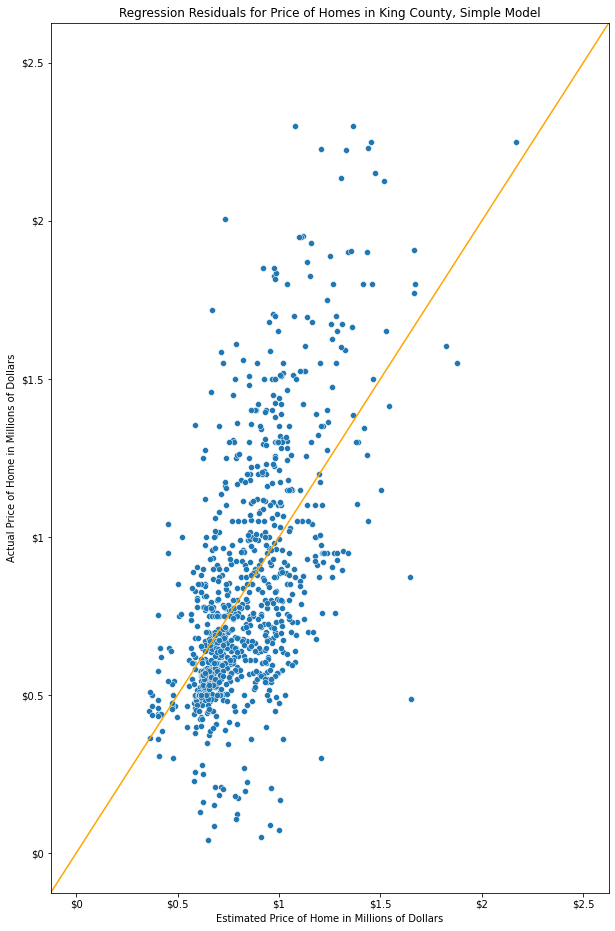

In [23]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = third_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0,2500000,500000)],[range(0,2500000,500000)]
plt.axline((0,0),(2500000,2500000), color = 'orange')
plt.show()

In [27]:
X_train_fourth_model = X_train_scaled[['sqft_living','price_sqft','grade_code']]
X_test_fourth_model = X_test_scaled[['sqft_living','price_sqft','grade_code']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

fourth_model = LinearRegression()
fourth_model.fit(X_train_fourth_model,y_train)

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=data_relevant[['sqft_living']],
    y=data_relevant.price,
    return_train_score=True,
    cv=splitter
)

fourth_predict_train = fourth_model.predict(X_train_fourth_model)
fourth_predict_test = fourth_model.predict(X_test_fourth_model)

fourth_train_RMSE = MSE(y_train,fourth_predict_train,squared = False)
fourth_test_RMSE = MSE(y_test,fourth_predict_test, squared = False)

print(f'Fourth Model Train score: {fourth_model_scores["train_score"].mean()}')
print(f'Fourth Model Train RMSE: {round(fourth_train_RMSE)}')
print()
print("Fourth Model Test score: ", fourth_model_scores["test_score"].mean())
print(f'Fourth Model Test RMSE: {round(fourth_test_RMSE)}')

Fourth Model Train score: 0.29797609622751514
Fourth Model Train RMSE: 103686.0

Fourth Model Test score:  0.2923191610503318
Fourth Model Test RMSE: 98594.0


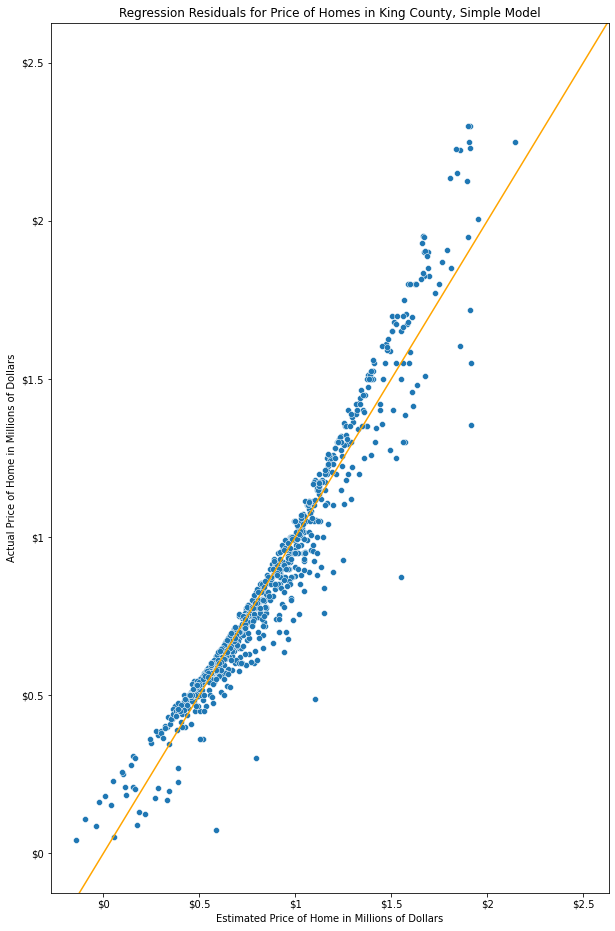

In [28]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = fourth_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0,2500000,500000)],[range(0,2500000,500000)]
plt.axline((0,0),(2500000,2500000), color = 'orange')
plt.show()

## Identifying Multicollinearity (Multicollinearity of Features - Lab)

In [30]:
df = data_relevant.copy()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2733,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2734,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2735,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [31]:
#Removing the target variable
data_pred = df.drop('price', axis=1)

In [32]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
bedrooms,1.000000,0.552902,0.507216,0.012414,NaN,0.096794,0.102825,-0.103518,0.100404,0.155861,0.091415,-0.224171
bathrooms,0.552902,1.000000,0.648968,0.053460,NaN,0.241359,0.230123,0.046059,0.080237,0.390228,0.043298,-0.144807
sqft_living,0.507216,0.648968,1.000000,0.230215,NaN,0.300421,0.391498,0.067967,0.025232,0.632437,0.005261,-0.194380
sqft_lot,0.012414,0.053460,0.230215,1.000000,NaN,0.054422,0.177822,0.079750,-0.049367,0.148946,-0.021704,0.018907
floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_garage,0.096794,0.241359,0.300421,0.054422,NaN,1.000000,0.140906,0.035244,-0.074634,0.381313,-0.033250,-0.007030
sqft_patio,0.102825,0.230123,0.391498,0.177822,NaN,0.140906,1.000000,-0.038345,-0.012564,0.274350,0.081138,-0.003239
yr_built,-0.103518,0.046059,0.067967,0.079750,NaN,0.035244,-0.038345,1.000000,0.023774,0.154250,-0.317305,0.048091
postal_code,0.100404,0.080237,0.025232,-0.049367,NaN,-0.074634,-0.012564,0.023774,1.000000,-0.014933,-0.099588,0.000705
grade_code,0.155861,0.390228,0.632437,0.148946,NaN,0.381313,0.274350,0.154250,-0.014933,1.000000,-0.079310,0.114037


In [33]:
#0.5 is used as the cut off for high-correlation
abs(data_pred.corr()) > 0.5

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
bedrooms,True,True,True,False,False,False,False,False,False,False,False,False
bathrooms,True,True,True,False,False,False,False,False,False,False,False,False
sqft_living,True,True,True,False,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,False,False,False,False,False
sqft_garage,False,False,False,False,False,True,False,False,False,False,False,False
sqft_patio,False,False,False,False,False,False,True,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False
postal_code,False,False,False,False,False,False,False,False,True,False,False,False
grade_code,False,False,True,False,False,False,False,False,False,True,False,False


In [34]:
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df

,level_0,level_1,0
0,bedrooms,bedrooms,1.000000
12,bathrooms,bathrooms,1.000000
108,condition_code,condition_code,1.000000
96,grade_code,grade_code,1.000000
84,postal_code,postal_code,1.000000
...,...,...,...
31,sqft_living,condition_code,0.005261
115,price_sqft,sqft_patio,0.003239
65,sqft_patio,price_sqft,0.003239
117,price_sqft,postal_code,0.000705


In [35]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [36]:
df[(df.cc>.5) & (df.cc <1)]

,cc
pairs,
"(bathrooms, sqft_living)",0.648968
"(grade_code, sqft_living)",0.632437
"(bedrooms, bathrooms)",0.552902
"(bedrooms, sqft_living)",0.507216


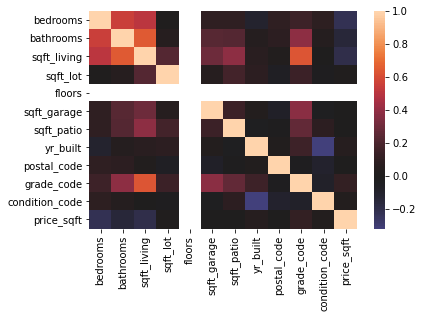

In [37]:
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

It appears the variables `'bathrooms'`, `'sqft_living'`, `'grade_code'`, and `'bedrooms'` are highly correalted. Remvoal of three of the four features would be best to remove collinear features.

In [38]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

data_relevant['in_Seattle'] = np.where(data_relevant['postal_code'].isin(Seattle_postalcodes),1,0)

In [39]:
data_relevant['in_Seattle'].value_counts()

0    2520
1     217
Name: in_Seattle, dtype: int64

In [40]:
Seattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 1]
Seattle_Homes['price'].describe()

count    2.170000e+02
mean     8.945603e+05
std      3.139701e+05
min      1.220500e+05
25%      7.000000e+05
50%      8.380000e+05
75%      1.010000e+06
max      2.020000e+06
Name: price, dtype: float64

In [41]:
NotSeattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 0]
NotSeattle_Homes['price'].describe()

count    2.520000e+03
mean     8.377193e+05
std      3.921823e+05
min      4.118100e+04
25%      5.600000e+05
50%      7.150000e+05
75%      1.010325e+06
max      2.301000e+06
Name: price, dtype: float64

In [42]:
data_relevant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft,in_Seattle
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113,0
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713,0
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741,0
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481,1
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006,0
2733,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378,0
2734,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753,0
2735,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531,1


# Appendix

## Sanity Checks